In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

n=0

/tmp/ipykernel_217046/3004898569.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  E_cn1 = (rho0 * r**(n1+1))/(2*epsilon* (n1+3))


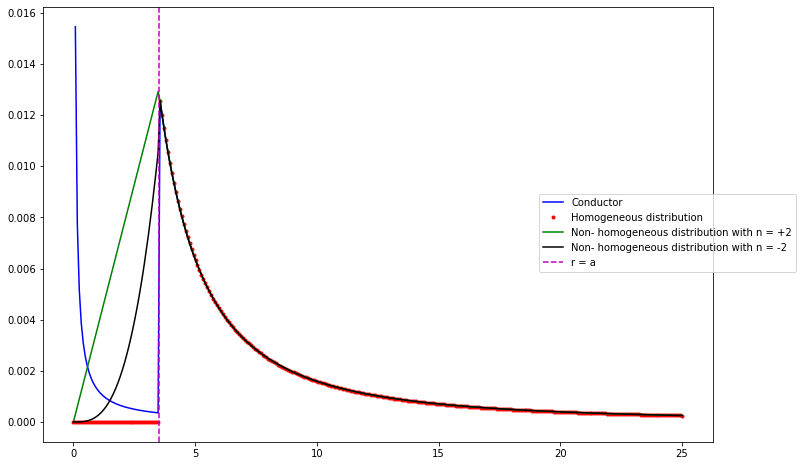

In [2]:
r = np.linspace(0,25,310)
E_alist, E_blist, E_cneg2_list, E_cpos2_list = [], [], [], []

def ElectricFieldab(r):
    Q = 2
    epsilon = 1
    a = 3.5
    rho0 = 0.0025
    if r<a:
        E_a = 0
        E_b = Q*r/(4* np.pi * epsilon * a**3)

    else:
        E_a = E_b = Q/(4* np.pi * epsilon * r**2)
    return E_a, E_b

def ElectricFieldc(r, n1, n2):
    Q = 2
    epsilon = 1
    a = 3.5
    rho0 = 0.0025
    if r<a:
        E_cn1 = (rho0 * r**(n1+1))/(2*epsilon* (n1+3))
        E_cn2 = (rho0 * r**(n2+1))/(2*epsilon* (n2+3))
        

    else:
        E_cn1 = E_cn2 = Q/(4* np.pi * epsilon * r**2)
    return E_cn1, E_cn2



for i in r:
    E_a, E_b = ElectricFieldab(i)
    E_cneg2, E_cpos2 = ElectricFieldc(i, -2, 2)
    
    E_alist.append(E_a)
    E_blist.append(E_b)
    E_cneg2_list.append(E_cneg2)
    E_cpos2_list.append(E_cpos2)

fig = plt.figure(figsize=(12,8))
ECneg2 = plt.plot(r, E_cneg2_list, 'b', label ='Conductor' )
EA = plt.plot(r, E_alist, 'r.', label = 'Homogeneous distribution')
EB = plt.plot(r, E_blist, 'g', label = 'Non- homogeneous distribution with n = +2')
ECpos2 = plt.plot(r, E_cpos2_list, 'k', label = 'Non- homogeneous distribution with n = -2')
plt.axvline(x = 3.5, color = 'm', linestyle = '--', label = 'r = a')


fig.legend(loc = 'center right')


plt.show()

#fig.legend((EA, EB, ECpos2, ECneg2 ), ('Conductor', 'Homogeneous distribution', 'Non- homogeneous distribution with n = +2', 'Non- homogeneous distribution with n = -2'), 'upper left')

In [3]:
r1 = np.linspace(0.001,25,500)
def chrgden(r1, y, z):
    import numpy as np
    a = [None] * len(r1)
    for idx,d in enumerate(r1):
        a[idx] = (-1/(2* np.pi * (d ** 2)))*(1+(y**2)/(d**2) + (z**2)/(d**2)) ** (-3/2)
    return a
#sigma = chrgden(r1)

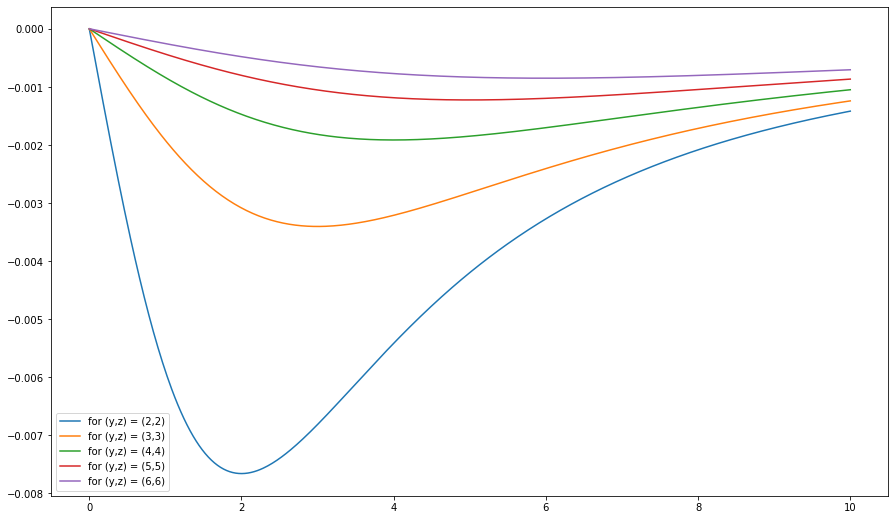

In [4]:

fig,ax = plt.subplots(1)
for z,y in enumerate(range(2,7)):
    r1 = np.linspace(0.001,10,500)
    sigma = chrgden(r1, y, y)
    pname = 'for (y,z) = ('+ str(y)+','+str(y)+')'
    ax.plot(r1,sigma, label = pname)
plt.legend()
fig.set_size_inches(15, 9)

In [56]:
def inv_cubic(r1):
    import numpy as np
    a = [None] * len(r1)
    for idx,d in enumerate(r1):
        a[idx] = (1/(d**3))
    return a

def exact_pot(r1):
    import numpy as np
    a = [None] * len(r1)
    for idx,d in enumerate(r1):
        a[idx] = 2*((1/d)-1/(1+d**2)**(1/2))
    return a

def third(y1, ep1):
    a = [None] * len(y1)
    for i in range(len(a)):
        a[i] = ep1[i]/y1[i]
    return a

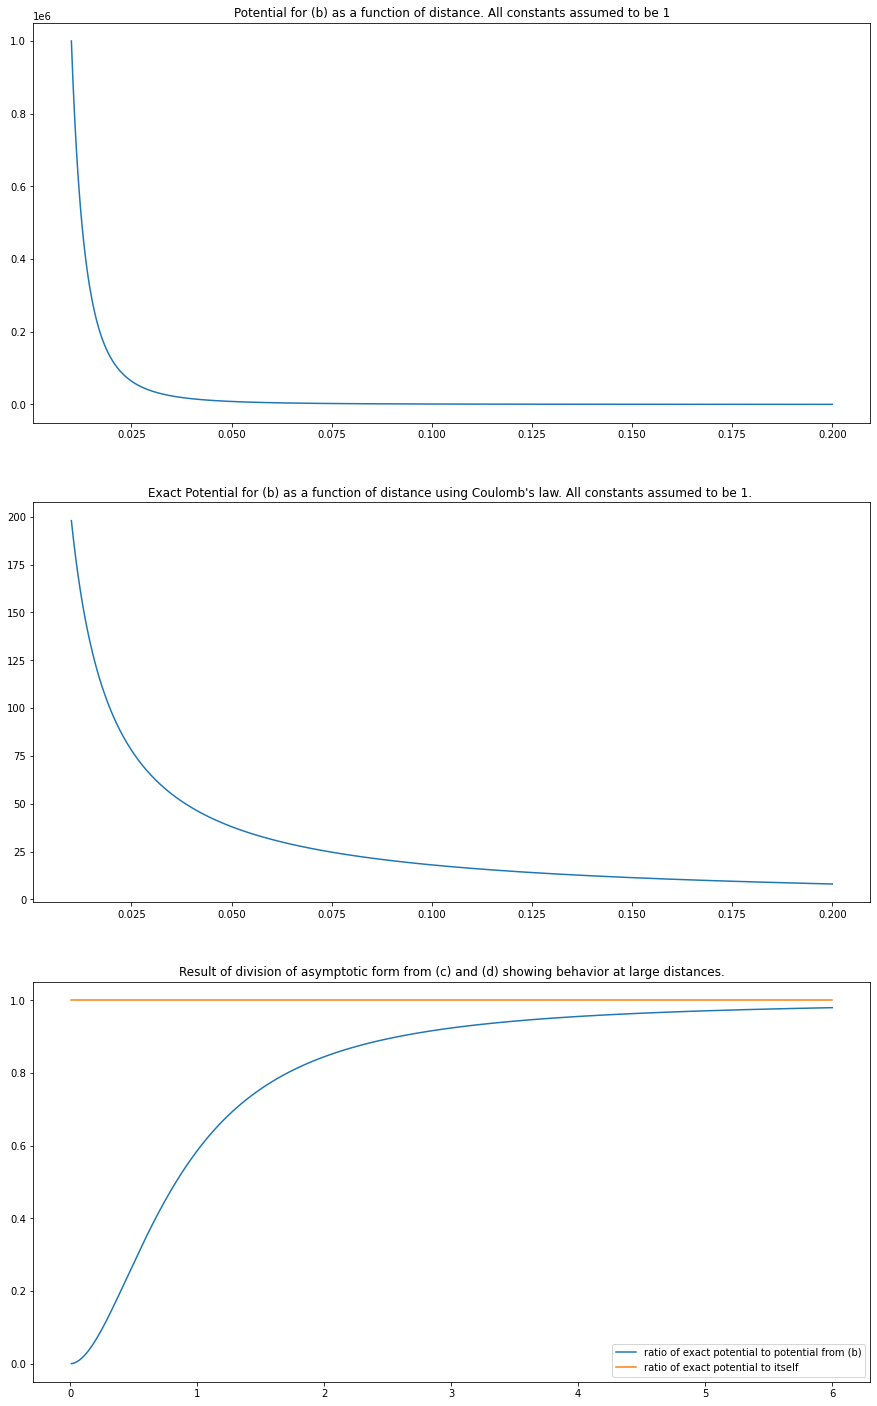

In [71]:

fig,ax = plt.subplots(3)
x1 = np.linspace(0.01,0.2,1000)
y1 = inv_cubic(x1)
ep1 = exact_pot(x1)


x2 = np.linspace(0.01,6,1000)
y2 = inv_cubic(x2)
ep2 = exact_pot(x2)


third2 = third(y2, ep2)
third3 = third(ep2, ep2)

ax[0].plot(x1,y1)
ax[0].set_title("Potential for (b) as a function of distance. All constants assumed to be 1")
ax[1].plot(x1,ep1)
ax[1].set_title("Exact Potential for (b) as a function of distance using Coulomb's law. All constants assumed to be 1. ")
ax[2].plot(x2, third2, label ="ratio of exact potential to potential from (b)")
ax[2].plot(x2,third3, label = "ratio of exact potential to itself")
ax[2].set_title("Result of division of asymptotic form from (c) and (d) showing behavior at large distances.")
plt.legend()
fig.set_size_inches(15, 25)

In [14]:
def B_b0(l10_mr, a_b):
    import numpy as np
    mr = 10**(l10_mr)
    BdivB0 = 4*mr/((mr+1)**2 -(mr -1)**2  * (a_b**2))
    return BdivB0

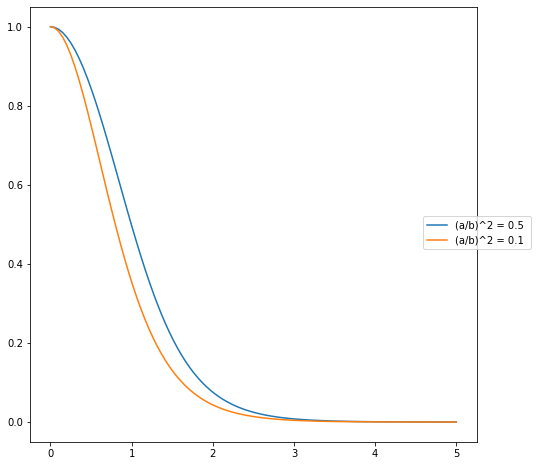

In [25]:
fig,ax = plt.subplots(1)
x1 = np.linspace(0,5,100)
y1 = B_b0(x1, np.sqrt(0.5))

y2 = B_b0(x1, np.sqrt(0.1))
ax.plot(x1,y1, label ="(a/b)^2 = 0.5 ")
ax.plot(x1,y2, label ="(a/b)^2 = 0.1 ")
fig.legend(loc = 'center right')
fig.set_size_inches(8, 8)

In [85]:
 def B_mu0M0(z_L):
    import numpy as np
    result = (-1/2)*(((z_L-1/2)/(np.sqrt(1/25+(z_L-1/2)**2)))-((z_L+1/2)/(np.sqrt(1/25+(z_L+1/2)**2))))
    return result

def H_M0(z_Llist):
    import numpy as np
    result = [None]*len(z_Llist)
    for idx, item in enumerate(z_Llist):
        z_L = z_Llist[idx]
        if(item > -0.5 and item < 0.5):
            result[idx] = (-1/2)*(2+((z_L-1/2)/(np.sqrt(1/25+(z_L-1/2)**2)))-((z_L+1/2)/(np.sqrt(1/25+(z_L+1/2)**2))))
        else:
            result[idx] = (-1/2)*(((z_L-1/2)/(np.sqrt(1/25+(z_L-1/2)**2)))-((z_L+1/2)/(np.sqrt(1/25+(z_L+1/2)**2))))
    return result

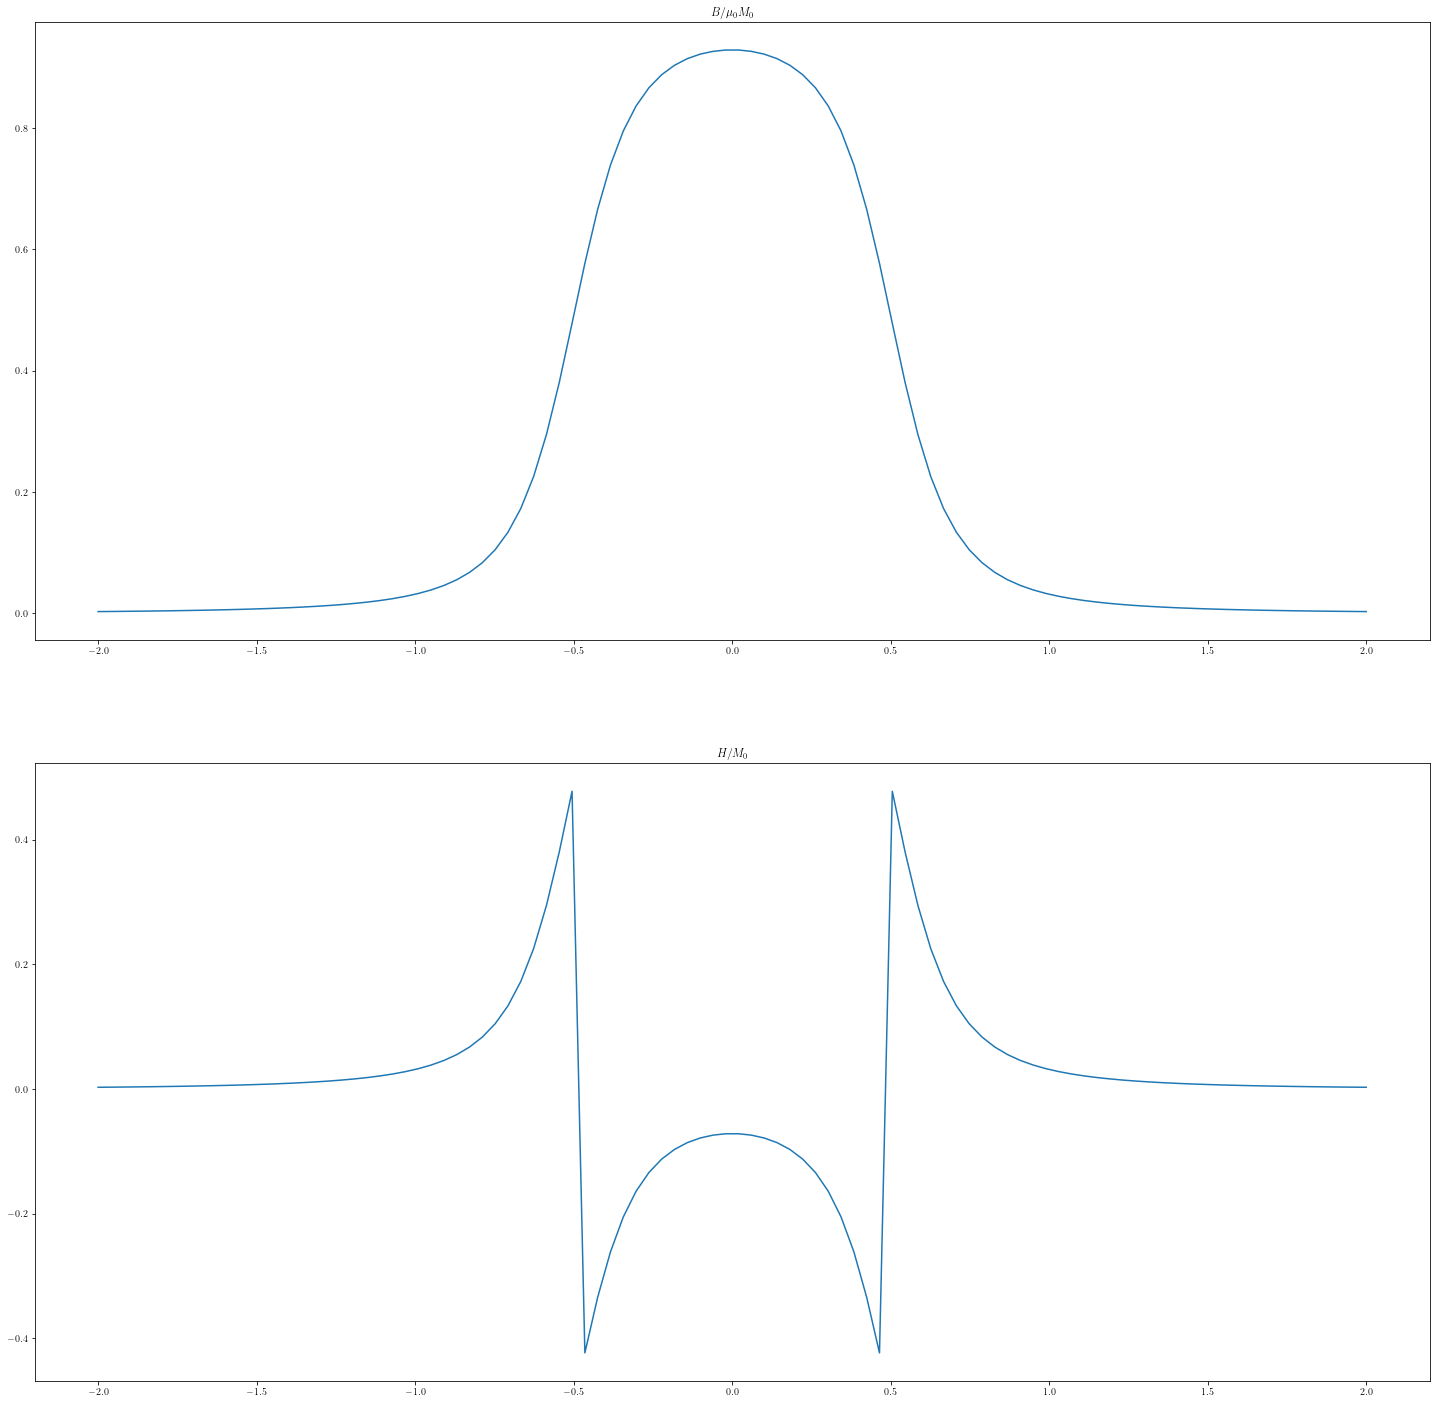

In [97]:
fig,ax = plt.subplots(2)
x1 = np.linspace(-2,2,100)
y1 = B_mu0M0(x1)

#plt.rcParams['text.usetex'] = True

y2 = H_M0(x1)
ax[0].plot(x1,y1)
ax[0].set_title('$B/ \mu_0 M_0$')
ax[1].plot(x1,y2)
ax[1].set_title("$H/M_0$")
#fig.legend(loc = 'center right')
fig.set_size_inches(25, 25)

In [60]:
a=-0.4
if(a > -0.5):
    print (a)

-0.4
